In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
print 'There are {} rows in the dataset'.format(str(len(df)))

There are 1460 rows in the dataset


In [5]:
df['LogSalePrice'] = np.log(df.SalePrice)
df = df.drop('SalePrice', axis=1)
target = 'LogSalePrice'
features = list(set(df.columns) - set([target, 'Id']))
nfeat = len(features)
print "There are {} features in the original dataset".format(nfeat) 

There are 79 features in the original dataset


Text(0,0.5,u'Freq')

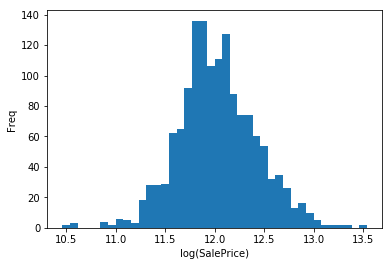

In [6]:
f, ax = plt.subplots()
ax.hist(df[target], bins=40)
ax.set_xlabel('log(SalePrice)')
ax.set_ylabel('Freq')

In [42]:
features

['3SsnPorch',
 'MasVnrType',
 'LotConfig',
 'LandSlope',
 'GarageQual',
 'Exterior1st',
 'GarageFinish',
 '2ndFlrSF',
 'HalfBath',
 'OverallQual',
 'OverallCond',
 'LotArea',
 'Electrical',
 'BsmtQual',
 'HouseStyle',
 'GrLivArea',
 'YearRemodAdd',
 'MasVnrArea',
 'Foundation',
 '1stFlrSF',
 'BsmtFullBath',
 'BsmtCond',
 'HeatingQC',
 'LotFrontage',
 'MiscVal',
 'CentralAir',
 'BsmtExposure',
 'Utilities',
 'KitchenAbvGr',
 'WoodDeckSF',
 'LotShape',
 'BsmtHalfBath',
 'TotalBsmtSF',
 'Condition1',
 'Condition2',
 'TotRmsAbvGrd',
 'MiscFeature',
 'YrSold',
 'PavedDrive',
 'OpenPorchSF',
 'LowQualFinSF',
 'BsmtUnfSF',
 'GarageYrBlt',
 'BldgType',
 'FullBath',
 'SaleType',
 'MSZoning',
 'Exterior2nd',
 'Heating',
 'MSSubClass',
 'GarageCars',
 'YearBuilt',
 'KitchenQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'GarageType',
 'LandContour',
 'PoolArea',
 'Neighborhood',
 'ScreenPorch',
 'Fence',
 'MoSold',
 'SaleCondition',
 'ExterQual',
 'Functional',
 'Alley',
 

In [29]:
df = df[[target]+features]
df_test = df_test[features]


df_all = pd.concat( [df[features], df_test[features]], axis=0 )
df_all

,3SsnPorch,MasVnrType,LotConfig,LandSlope,GarageQual,Exterior1st,GarageFinish,2ndFlrSF,HalfBath,OverallQual,...,Street,Fireplaces,GarageArea,ExterCond,PoolQC,FireplaceQu,EnclosedPorch,RoofMatl,BedroomAbvGr,GarageCond
0,0,BrkFace,Inside,Gtl,TA,VinylSd,RFn,854,1,7,...,Pave,0,548.0,TA,noPool,noFireplace,0,CompShg,3,TA
1,0,None,FR2,Gtl,TA,MetalSd,RFn,0,0,6,...,Pave,1,460.0,TA,noPool,TA,0,CompShg,3,TA
2,0,BrkFace,Inside,Gtl,TA,VinylSd,RFn,866,1,7,...,Pave,1,608.0,TA,noPool,TA,0,CompShg,3,TA
3,0,None,Corner,Gtl,TA,Wd Sdng,Unf,756,0,7,...,Pave,1,642.0,TA,noPool,Gd,272,CompShg,3,TA
4,0,BrkFace,FR2,Gtl,TA,VinylSd,RFn,1053,1,8,...,Pave,1,836.0,TA,noPool,TA,0,CompShg,4,TA
5,320,None,Inside,Gtl,TA,VinylSd,Unf,566,1,5,...,Pave,0,480.0,TA,noPool,noFireplace,0,CompShg,1,TA
6,0,Stone,Inside,Gtl,TA,VinylSd,RFn,0,0,8,...,Pave,1,636.0,TA,noPool,Gd,0,CompShg,3,TA
7,0,Stone,Corner,Gtl,TA,HdBoard,RFn,983,1,7,...,Pave,2,484.0,TA,noPool,TA,228,CompShg,3,TA
8,0,None,Inside,Gtl,Fa,BrkFace,Unf,752,0,7,...,Pave,2,468.0,TA,noPool,TA,205,CompShg,2,TA
9,0,None,Corner,Gtl,Gd,MetalSd,RFn,0,0,5,...,Pave,2,205.0,TA,noPool,TA,0,CompShg,2,TA


In [10]:
#see if there any of the columns have nulls
#desc = df.describe().T
def print_na_counts(df):
    na_counts = df.isnull().sum()
    na_counts = na_counts[ na_counts != 0 ]
    print na_counts.sort_values(ascending=False)
    
print_na_counts(df)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [30]:
values = {'PoolQC': 'noPool', 'MiscFeature': 'none', 'Alley': 'noAlley', 'Fence': 'noFence', 
          'FireplaceQu': 'noFireplace', 'GarageCond': 'noGarage', 'GarageType': 'noGarage', 'GarageYrBlt': 'noGarage',
          'GarageFinish': 'noGarage', 'GarageQual': 'noGarage', 'GarageCars': 0, 'GarageArea': 0,
          'BsmtExposure': 'noBasement',  'BsmtFinType2': 'noBasement', 'BsmtFinType1': 'noBasement',
          'BsmtCond': 'noBasement', 'BsmtQual': 'noBasement', 'BsmtFinSF2': 0, 'BsmtFinSF1': 0, 
          'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'MasVnrType':'None', 'MasVnrArea': 0.0}

df = df.fillna(value=values)
df_test = df_test.fillna(value=values)
df_all = df_all.fillna(value=values)

cat_to_imputation = ['Electrical', 'Exterior1st', 'Exterior2nd', 'MSZoning', 'SaleType', 'KitchenQual', 'Functional', 'Utilities']

for col in cat_to_imputation:
    df[col] = df[col].fillna(df[col].value_counts().index[0])
    df_test[col] = df_test[col].fillna(df_test[col].value_counts().index[0])
    df_all[col] = df_all[col].fillna(df_all[col].value_counts().index[0])


In [69]:
garage_f = ['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCars', 'GarageArea']
garage_v = ['noGarage', 'noGarage', 'noGarage', 'noGarage', 'noGarage', 0, 0]

mask = np.zeros( len(df_all) ).astype(bool)
for fi, vi in zip(garage_f, garage_v):
    mask = mask | (df_all[fi] == vi)

    
df_all[mask].groupby(garage_f).size()



GarageCond  GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCars  GarageArea
noGarage    Detchd      1910         noGarage      noGarage    1.0         360.0          1
                        1923         noGarage      noGarage    0.0         0.0            1
            noGarage    1872         noGarage      noGarage    0.0         0.0            1
                        1875         noGarage      noGarage    0.0         0.0            1
                        1890         noGarage      noGarage    0.0         0.0            2
                        1895         noGarage      noGarage    0.0         0.0            2
                        1900         noGarage      noGarage    0.0         0.0            3
                        1902         noGarage      noGarage    0.0         0.0            1
                        1905         noGarage      noGarage    0.0         0.0            1
                        1907         noGarage      noGarage    0.0         0.0        

In [54]:
is_detached = df_all.GarageType == 'Detchd'

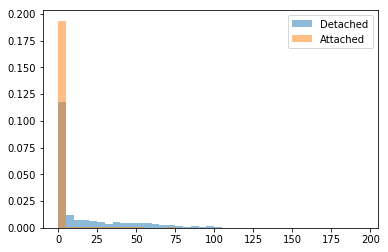

In [60]:
f, ax = plt.subplots()
ax.hist( 
    (df_all[~mask & is_detached].GarageYrBlt - df_all[~mask & is_detached].YearBuilt).values.astype(float), 
    np.arange(0, 200,5),
    alpha=0.5 ,
    normed=True,
    label='Detached'
)
ax.hist( (df_all[~mask & ~is_detached].GarageYrBlt - df_all[~mask & ~is_detached].YearBuilt).values.astype(float),
    np.arange(0, 200,5),
    alpha=0.5,
    normed=True,
    label='Attached'
)
ax.legend()
#ax.set_yscale('log')

In [61]:
df_all.loc[ df_all.GarageYrBlt == 'noGarage', 'GarageYrBlt'] = df_all.loc[ df_all.GarageYrBlt == 'noGarage', 'YearBuilt']


In [63]:
df_all[mask].groupby(['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCars', 'GarageArea']).size()

GarageCond  GarageType  GarageFinish  GarageQual  GarageCars  GarageArea
noGarage    Detchd      noGarage      noGarage    0.0         0.0             1
                                                  1.0         360.0           1
            noGarage    noGarage      noGarage    0.0         0.0           157
dtype: int64

In [74]:
df_tmp = df_all[df_all.GarageType == 'Detchd'][garage_f]
oddballs = np.zeros(len(df_all))

rm_garage_type = (df_all.GarageType != 'noGarage') & ((df_all.GarageCars == 0.0) & (df_all.GarageArea == 0.0))
fill_garage_modes = (df_all.GarageType == 'Detchd') & ((df_all.GarageCars != 0.0) & (df_all.GarageArea != 0.0))

df_all.loc[rm_garage_type, 'GarageType'] = 'noGarage'
df_detached_garage = df_all[df_all.GarageType == 'Detchd']
df_all.loc[fill_garage_modes, 'GarageFinish'] = df_detached_garage.GarageFinish.value_counts().index[0]
df_all.loc[fill_garage_modes, 'GarageCond'] = df_detached_garage.GarageCond.value_counts().index[0]
df_all.loc[fill_garage_modes, 'GarageQual'] = df_detached_garage.GarageQual.value_counts().index[0]


In [75]:
df_all[mask].groupby(['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCars', 'GarageArea']).size()


GarageCond  GarageType  GarageFinish  GarageQual  GarageCars  GarageArea
TA          Detchd      Unf           TA          1.0         360.0           1
noGarage    noGarage    noGarage      noGarage    0.0         0.0           158
dtype: int64

In [ ]:
print_na_counts(df)
print len(df)

In [ ]:
df['LotAreaSqrt'] = np.sqrt(df['LotArea'])
df['1stFlrSFSqrt'] = np.sqrt(df['1stFlrSF'])

print_na_counts(df_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_vals = ['LotAreaSqrt' ,     
'1stFlrSF'         ,
'1stFlrSFSqrt'     ,
'LotArea'          ,
'GrLivArea'        ,
'TotalBsmtSF'      ,
'MSSubClass'       ,
'LogSalePrice'     ,
'TotRmsAbvGrd'  ]
   

df_all = pd.concat([df, df_test], axis=0)
df_lin_train = df_all[x_vals + ['LotFrontage']].dropna()

#lr = LinearRegression()
lr = RandomForestRegressor()

lr.fit( df_lin_train[x_vals].values, df_lin_train['LotFrontage'].values )

na_mask = df.LotFrontage.isna()


df.loc[na_mask,'LotFrontage'] = lr.predict( df.loc[na_mask, x_vals].values )
#na_mask

In [ ]:
f, ax = plt.subplots()
ax.plot( df['LotFrontage'][~na_mask].values, df['LotAreaSqrt'][~na_mask].values, ls='', marker='.', ms=0.5 )
ax.plot( df['LotFrontage'][ na_mask].values, df['LotAreaSqrt'][ na_mask].values, ls='', marker='.', ms=0.5 )



In [ ]:


df.corr()['LotFrontage'].abs().sort_values(ascending=False)

In [ ]:
na_mask

In [ ]:
f, ax = plt.subplots()
ax.plot( df.LotFrontage, df.LotArea, ls='', marker='.' )
ax.set_xlim([0,200])
ax.set_ylim([0,50000])

In [ ]:
df.Exterior1st.value_counts()

In [ ]:
#see which columns are which datatype
datatypes = df.dtypes
str_cols = datatypes[datatypes == 'object'].index.values.tolist()
float_cols = datatypes[datatypes == 'float64'].index.values.tolist()
int_cols = datatypes[datatypes == 'int64'].index.values.tolist()


In [ ]:
float_cols

In [ ]:
cont_null_cols

In [ ]:
#int_cols

In [ ]:
#plot all of the features
def plot_features(df, features, ax=None, **kwargs):
    nfeat = len(features)
    ncols = 3
    nrows = int(np.ceil(nfeat*1.0/ncols))
    if ax is None:
        f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[12, nrows*4])
    else:
        f = ax[0][0].get_figure()
        
    for i, (row, col) in enumerate(itertools.product(range(nrows), range(ncols))):
        if i < nfeat:
            axi = ax[row][col]
            axi.hist( df[features[i]].dropna(), **kwargs )
            axi.set_xlabel(features[i])
    
    return f,ax


f, ax = plot_features(df, features)

In [ ]:
def draw_nice_correlations(df):

    numerical_cols = df.dtypes[df.dtypes != 'object'].index.values
    df = df[numerical_cols]
  
    X = df.corr()
    d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.25*d.max(), 'distance')
    columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
    X = X.loc[columns,columns]
    f,ax=plt.subplots(figsize=(20,20))
    sns.heatmap(X, cmap=sns.diverging_palette(240, 10, n=100),vmin=-1, vmax=1,xticklabels=X.columns.values, yticklabels=X.columns.values,ax=ax, annot=True, annot_kws={'size':4}, square=True)
    return f, ax


In [ ]:
draw_nice_correlations(df)

In [ ]:
final_features = int_cols

In [ ]:
# str_cols
df.MasVnrType.head().iloc[1]

In [ ]:
nulls = df.isnull().sum()
nulls= nulls[ nulls !=0 ].index.values.tolist()
print set(str_cols) - set(nulls)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

le.fit(df.LotConfig)
print list(le.classes_)
t = le.transform(df.LotConfig)
print t
ohe.fit(t.reshape(-1,1))
t1 = ohe.transform(t.reshape(-1,1))
t1

In [ ]:
train, test = train_test_split(df[final_features + [target]], test_size=0.4, random_state=31)
X_train, y_train = train[final_features].values, train[target].values
X_test, y_test = test[final_features].values, test[target].values


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=123456, min_samples_leaf=200)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict( X_test )
rmse = mean_squared_error(y_test, y_pred) 
print rmse